In [1]:
import numpy as np
import axelrod as axl
import opt_mo

import sympy as sym

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
p_1, p_2, p_3, p_4 = sym.symbols('p_1, p_2, p_3, p_4')
p = (p_1, p_2, p_3, p_4)

Let's look at a reactive case. Where two random opponents are choosen.

In [29]:
axl.seed(16)
random_opponents = [np.random.random(4) for _ in range(1)]

The best response to that enviroment can be calculted exactly.

In [30]:
solution_set = opt_mo.reactive_set(random_opponents)
solution = opt_mo.argmax(random_opponents, solution_set)

In [31]:
solution

(0, 0.4687337764230536, 1.7582225406868621)

The plot validates the results.

(<matplotlib.contour.QuadContourSet at 0x7f19b189c128>,
 <matplotlib.colorbar.Colorbar at 0x7f19b184f7b8>)

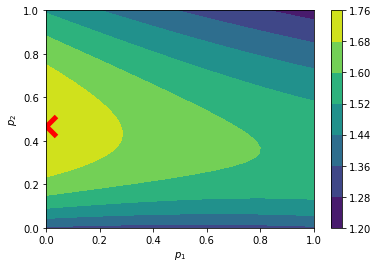

In [34]:
opt_mo.plot_argmax(random_opponents, solution)

Now for the best response dynamics the self interaction of the strategy will be added in the utility. This will not break the quadratic assumption as it will be added as a constant.

We will high jack the `reactive_set` function.

In [63]:
opt_mo.utility?

In [72]:
def reactive_set_dynamics(opponents, sub_player):
    p_1, p_2 = sym.symbols("p_1, p_2")
    # line that changes
    utility = -opt_mo.tournament_utility((p_1, p_2, p_1, p_2), opponents) + opt_mo.utility((p_1, p_2, p_1, p_2), sub_player)

    derivatives = [sym.diff(utility, i) for i in [p_1, p_2]]
    derivatives = [expr.factor() for expr in derivatives]

    fractions = [sym.fraction(expr) for expr in derivatives]
    num = [expr[0] for expr in fractions]
    den = [expr[1] for expr in fractions]

    # roots p_1 for derivative
    p_one_roots = opt_mo.eliminator_method(num, p_1, p_2)

    p_two_roots = set()
    if p_one_roots:
        p_two_roots.update(opt_mo.solve_system(num, p_2, p_one_roots, p_1))

    # roots of p_2 for edges
    for p_one_edge in [0, 1]:
        coeffs = sym.Poly(num[1].subs({p_1: p_one_edge}), p_2).all_coeffs()
        roots = opt_mo.feasible_roots(coeffs)
        p_two_roots.update(roots)

    solution_set = p_one_roots | p_two_roots | set([0, 1])
    return solution_set

In [73]:
axl.seed(18)
random_opponents = [np.random.random(4) for _ in range(1)]

In [ ]:
iterations = 0
p_sub =  (0, 0, 0, 0)
p_optimal = (1, 1, 1, 1)
while np.isclose(p_sub, p_optimal, atol=10 ** -2).all() == False:
    p_sub = p_optimal
    
    solution_set = reactive_set_dynamics(opponents=random_opponents, sub_player=p_sub)
    solution = opt_mo.argmax(random_opponents, solution_set)
    
    p_optimal = (solution[0], solution[1], solution[0], solution[1])
    
    iterations += 1
    print(iterations)

1


In [71]:
iterations

2